In [14]:
from pandas import read_csv
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import subplots, savefig, show
from ds_charts import get_variable_types, HEIGHT
from matplotlib.pyplot import figure, savefig, show, title
from seaborn import heatmap

In [15]:
register_matplotlib_converters()
filename = "new_data/set2_symbolic_to_numeric.csv"
data = read_csv(filename)
data

,date,FID,City_EN,Prov_EN,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,...,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std,hour,day,year
0,2020-01-01,0,Beijing,Beijing,1100,11,24.0,1,0.792917,0.60,...,38.0,86.0,14.044572,6.708333,3.0,12.0,2.440614,1,1,2020
1,2020-01-01,1,Tianjin,Tianjin,1200,12,245.0,1,1.157083,0.71,...,64.0,123.0,17.327723,14.208333,9.0,20.0,3.054766,1,1,2020
2,2020-01-01,2,Shijiazhuang,Hebei,1301,13,228.0,1,1.489167,1.17,...,114.0,168.0,15.249772,26.208333,22.0,33.0,2.676739,1,1,2020
3,2020-01-01,3,Tangshan,Hebei,1302,13,244.0,1,1.882083,1.10,...,91.0,192.0,30.202068,35.208333,17.0,91.0,18.009209,1,1,2020
4,2020-01-01,4,Qinhuangdao,Hebei,1303,13,201.0,1,1.389583,0.78,...,51.0,123.0,18.511070,25.416667,15.0,44.0,5.596998,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169268,2021-03-24,530800,Puer,Yunnan,530800,53,NaN,1,0.575000,0.40,...,6.0,87.0,27.025708,4.250000,3.0,20.0,3.319764,3,24,2021
169269,2021-03-24,640500,Zhongwei,Ningxia,640500,64,NaN,0,0.389583,0.15,...,118.0,241.0,36.133794,11.375000,5.0,23.0,5.368213,3,24,2021
169270,2021-03-24,652801,Kuerle,Xinjiang,652801,65,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,24,2021
169271,2021-03-24,659001,Shihezi,Xinjiang,659001,65,NaN,0,0.639583,0.40,...,34.0,323.0,97.537137,7.208333,5.0,11.0,1.471370,3,24,2021


In [16]:
data.drop(columns=['FID','GbProv','Field_1'], inplace=True)
corr_mtx = data.corr()
corr_mtx

,ALARM,CO_Mean,CO_Min,CO_Max,CO_Std,NO2_Mean,NO2_Min,NO2_Max,NO2_Std,O3_Mean,...,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std,hour,day,year
ALARM,1.000000,-0.468988,-0.402998,-0.358219,-0.246438,-0.407320,-0.424370,-0.326786,-0.187747,0.178849,...,-0.527679,-0.416412,-0.310602,-0.252031,-0.258115,-0.158751,-0.135813,0.055661,0.004413,-0.120423
CO_Mean,-0.468988,1.000000,0.819696,0.845236,0.654005,0.558526,0.559891,0.436260,0.252799,-0.275408,...,0.382517,0.186977,0.097855,0.455780,0.424707,0.312465,0.281773,-0.042363,-0.036728,0.114451
CO_Min,-0.402998,0.819696,1.000000,0.498204,0.175580,0.425825,0.554032,0.267329,0.042489,-0.241097,...,0.359220,0.103594,0.011781,0.275059,0.342267,0.141402,0.104353,-0.041286,-0.029718,0.082647
CO_Max,-0.358219,0.845236,0.498204,1.000000,0.902921,0.467998,0.390676,0.431041,0.333615,-0.210133,...,0.287146,0.192737,0.128972,0.444102,0.350219,0.363819,0.345437,-0.030948,-0.030543,0.099318
CO_Std,-0.246438,0.654005,0.175580,0.902921,1.000000,0.345569,0.218396,0.355833,0.339445,-0.139976,...,0.175679,0.168096,0.137067,0.367265,0.245969,0.320519,0.318563,-0.019029,-0.020196,0.077769
NO2_Mean,-0.407320,0.558526,0.425825,0.467998,0.345569,1.000000,0.856600,0.893928,0.680525,-0.335725,...,0.437701,0.204615,0.101891,0.419125,0.411210,0.272877,0.240566,0.056703,-0.011793,0.128195
NO2_Min,-0.424370,0.559891,0.554032,0.390676,0.218396,0.856600,1.000000,0.635782,0.272795,-0.386141,...,0.427305,0.155952,0.051583,0.339176,0.406533,0.177021,0.134890,0.046873,-0.019500,0.128456
NO2_Max,-0.326786,0.436260,0.267329,0.431041,0.355833,0.893928,0.635782,1.000000,0.893762,-0.186295,...,0.378001,0.222657,0.135492,0.372973,0.331993,0.276279,0.253097,0.045528,-0.007017,0.105678
NO2_Std,-0.187747,0.252799,0.042489,0.333615,0.339445,0.680525,0.272795,0.893762,1.000000,-0.044327,...,0.247726,0.195350,0.144563,0.292744,0.202908,0.251959,0.249182,0.031682,0.001585,0.066979
O3_Mean,0.178849,-0.275408,-0.241097,-0.210133,-0.139976,-0.335725,-0.386141,-0.186295,-0.044327,1.000000,...,-0.084629,-0.022396,-0.007191,-0.118345,-0.104622,-0.076033,-0.068873,-0.081860,0.041888,-0.142772


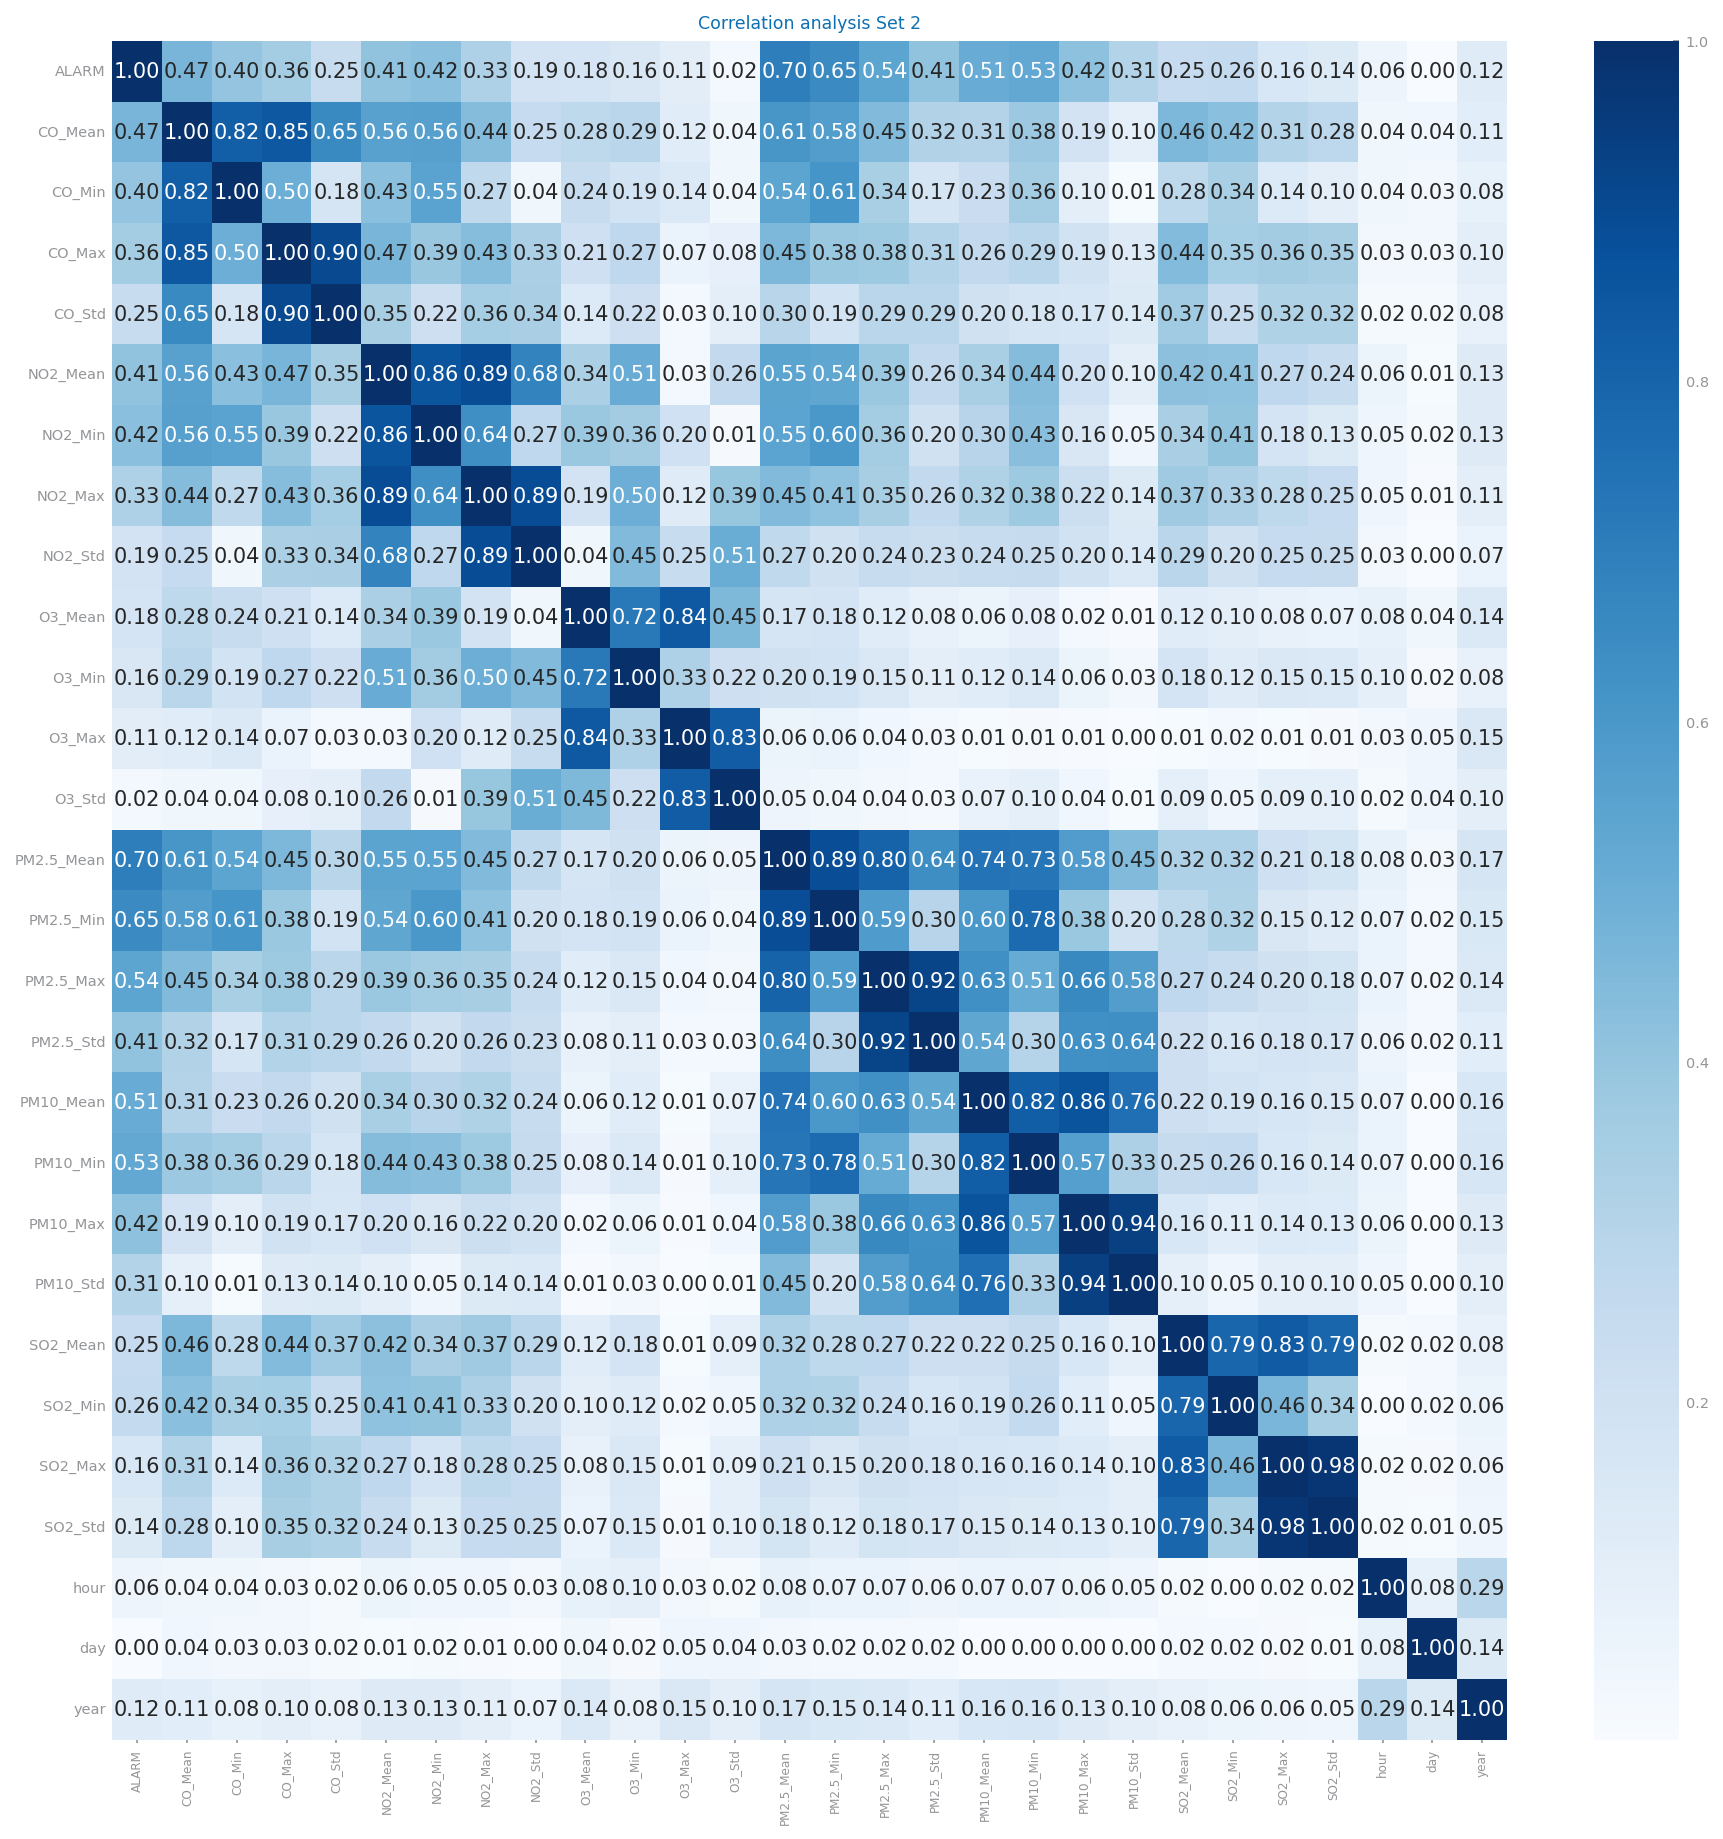

In [17]:
fig = figure(figsize=[15, 15])
fig.patch.set_facecolor('white')
heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues', fmt='.2f')
title('Correlation analysis Set 2')
savefig(f'images/set2/correlation_analysis_set2.png')
show()

In [18]:

correlations = []
for row in corr_mtx.index.values:
    for column in corr_mtx.columns:
        mod_r = corr_mtx.loc[row][column]
        if row != column and corr_mtx.loc[row][column] > 0.7:
            correlations.append((row, column, round(mod_r, 2)))
correlations.sort(key=lambda x:x[2])
for correlation in correlations:
    row = correlation[0]
    column = correlation[1]
    mod_r = correlation[2]
    print("(" + row + ", " + column + ", |r| = " + str(mod_r) +"), ", end="")

(O3_Mean, O3_Min, |r| = 0.72), (O3_Min, O3_Mean, |r| = 0.72), (PM2.5_Mean, PM10_Min, |r| = 0.73), (PM10_Min, PM2.5_Mean, |r| = 0.73), (PM2.5_Mean, PM10_Mean, |r| = 0.74), (PM10_Mean, PM2.5_Mean, |r| = 0.74), (PM10_Mean, PM10_Std, |r| = 0.76), (PM10_Std, PM10_Mean, |r| = 0.76), (PM2.5_Min, PM10_Min, |r| = 0.78), (PM10_Min, PM2.5_Min, |r| = 0.78), (SO2_Mean, SO2_Min, |r| = 0.79), (SO2_Mean, SO2_Std, |r| = 0.79), (SO2_Min, SO2_Mean, |r| = 0.79), (SO2_Std, SO2_Mean, |r| = 0.79), (PM2.5_Mean, PM2.5_Max, |r| = 0.8), (PM2.5_Max, PM2.5_Mean, |r| = 0.8), (CO_Mean, CO_Min, |r| = 0.82), (CO_Min, CO_Mean, |r| = 0.82), (PM10_Mean, PM10_Min, |r| = 0.82), (PM10_Min, PM10_Mean, |r| = 0.82), (O3_Max, O3_Std, |r| = 0.83), (O3_Std, O3_Max, |r| = 0.83), (SO2_Mean, SO2_Max, |r| = 0.83), (SO2_Max, SO2_Mean, |r| = 0.83), (O3_Mean, O3_Max, |r| = 0.84), (O3_Max, O3_Mean, |r| = 0.84), (CO_Mean, CO_Max, |r| = 0.85), (CO_Max, CO_Mean, |r| = 0.85), (NO2_Mean, NO2_Min, |r| = 0.86), (NO2_Min, NO2_Mean, |r| = 0.86), 